# Análisis Exploratorio de Datos

## Importar librerías

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

sns.set_style("white")
import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carga de los datos limpios

In [34]:
archivo = 'BBDD_Hospitalizacion_limpio.csv'
df = pd.read_csv(archivo)
print(f'Se cargaron los datos del archivo {archivo}')

Se cargaron los datos del archivo BBDD_Hospitalizacion_limpio.csv


## Exploración inicial

In [35]:
df

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       433 non-null    int64  
 1   diabetes                   433 non-null    object 
 2   hospitaliz_ult_mes         433 non-null    object 
 3   psa                        433 non-null    float64
 4   biopsias_prev              433 non-null    object 
 5   vol_prostatico             433 non-null    object 
 6   antibiotico_en_profilaxis  433 non-null    object 
 7   nro_muestras               433 non-null    int64  
 8   cup                        433 non-null    object 
 9   epoc                       433 non-null    object 
 10  biopsia                    433 non-null    object 
 11  nro_dias_con_infecc        433 non-null    int64  
 12  fiebre                     433 non-null    object 
 13  itu                        433 non-null    object 

In [37]:
df.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,433,433,433,433,433,433,433,433,433,433,433,433,433,433
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,381,429,389,307,345,430,419,213,397,427,425,425,426,410


# Variables numéricas

Se observan el resumen estadístico para las variables numéricas y a continuación se visualizan las distribuciones de cada una de las columnas.

In [38]:
df.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


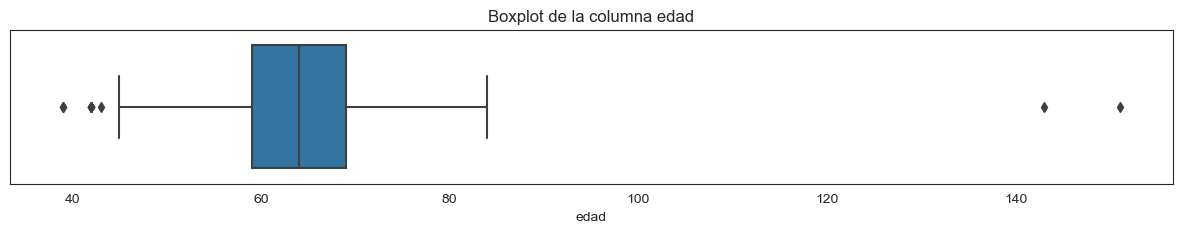

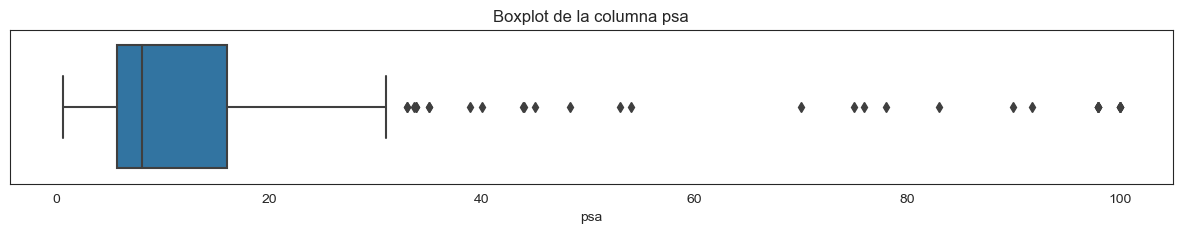

In [39]:
# Visualización de Edad y PSA
categorias = ['edad', 'psa']

for c in categorias:
    utils.boxplot(df, c)

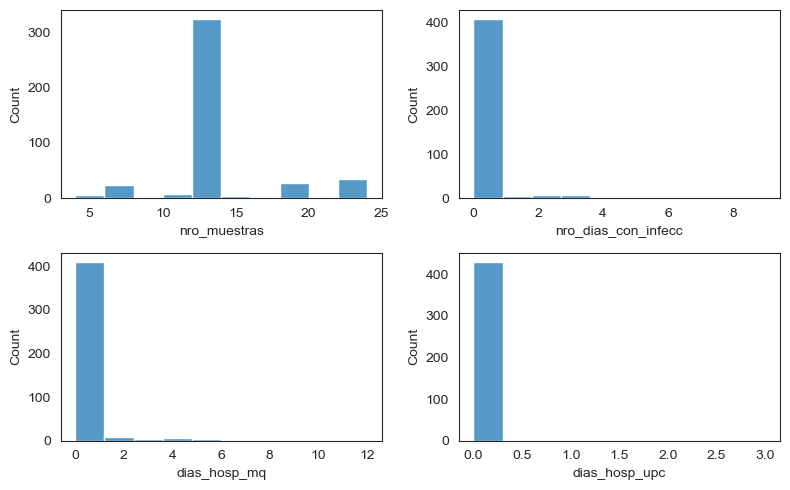

In [40]:
# Visualización para las restantes categóricas
columnas_categoricas = ['nro_muestras', 'nro_dias_con_infecc', 'dias_hosp_mq', 'dias_hosp_upc']
utils.histplot_categoricas(df, columnas_categoricas)

En el siguiente código se hacen algunos cálculos de utilidad para analizar las visualizaciones anteriores.

In [41]:
# Se calcula cual es el límite del bigote máximo
utils.bigote_max(df['psa'])

# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'nro_muestras')

utils.valor_mas_frecuente(df, 'nro_dias_con_infecc')
# Se analizan cuantos pacientes sí tienen complicaciones
con_complicaciones = (df['nro_dias_con_infecc'] > 0)
print(f'Hay {con_complicaciones.sum()} que presentaron complicaciones post la biopsia.')

# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'dias_hosp_mq')

# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'dias_hosp_upc')

El bigote superior de la variable psa se ubica en: 31.45
Hay 31 valores atípicos en la variable psa
Valor mas frecuente de nro_muestras es 12, con una cantidad de 325 y representa el 75.06%.
Valor mas frecuente de nro_dias_con_infecc es 0, con una cantidad de 408 y representa el 94.23%.
Hay 25 que presentaron complicaciones post la biopsia.
Valor mas frecuente de dias_hosp_mq es 0, con una cantidad de 410 y representa el 94.69%.
Valor mas frecuente de dias_hosp_upc es 0, con una cantidad de 430 y representa el 99.31%.


De las visualizaciones anteriores, se ve que la variable *edad* presenta claramente dos valores atípicos que pueden observarse en el boxplot, donde tales pacientes tendrían mas de 140 años, por lo tanto esos datos se decide borrarlos y recalcular las estadísticas.

Cantidad de valores mayores a 100 años: 0


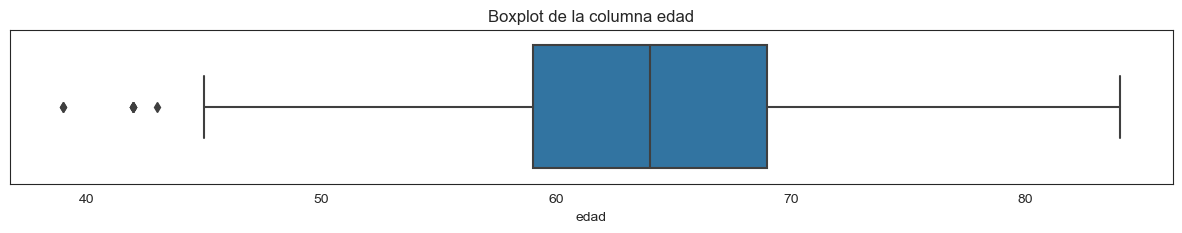

ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA
count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: edad, dtype: float64


In [42]:
# Se eliminan registros y se verifica su eliminación
df = df[df['edad'] <= 100]
print('Cantidad de valores mayores a 100 años:', (df['edad'] > 100).sum())

# Se revisa nuevamente el boxplot
utils.boxplot(df, 'edad')

#Estadísticas de la columna
print('ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA')
print(df['edad'].describe())

De esta manera, para la variebla **edad** se puede ver que el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años.

En cuanto a la variable **psa** se aprecia en la visualización que el 75% de los registros tienen concentraciones por debajo de los 16 ng/ml. Por otra parte, hay 31 pacientes que se ubican en por encima de los 31,45 ng/ml considerados estadísticamente atípicos. Si bien la bibliografía consultada no determina valores máximos para esta concentración pero sí indica que es posible hallar valores altos en situaciones específicas, entonces se decide dejarlos en el conjunto de datos.

La variable **nro_muestras** indica la cantidad de muestras que son tomadas al momento de la biopsia y se puede ver que se pareciera ser práctica común tomar 12 muestras dado que representan casi el 75% de los casos registrados. En algunos se llegaron a tomar 18 y 24 muestras.

En relación con los **nro_dias_con_infecc** se ve que el 94.2% de los pacientes presentaron 0 días, por lo tanto se considera que no tuvieron infección. Por otra parte, 25 pacientes presentaron infección desde 1 a 3 días luego de la intervención.

In [43]:
# df['nro_dias_con_infecc'] = df['nro_dias_con_infecc'].apply(utils.convertir_si_no_infecc)
# df['nro_dias_con_infecc'].value_counts()

En cuanto a las variables **dias_hosp_mq** y **dias_hosp_ipc** se observan que son variables con 94.66% y 99.3% de valores 0, es decir, que el paciente no fue hospitalizado ni por razones médico quirúrgicas ni en estado crítico. Por otra parte, considerando que la varible objetivo es predecir qué pacientes serán o no hospitalizados, se considera que esta variable podría ser redundante. Se decide eliminar estas columnas del conjuto de datos.

In [44]:
columnas_a_eliminar = ['dias_hosp_mq','dias_hosp_upc']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['edad', 'diabetes', 'hospitaliz_ult_mes', 'psa', 'biopsias_prev',
       'vol_prostatico', 'antibiotico_en_profilaxis', 'nro_muestras', 'cup',
       'epoc', 'biopsia', 'nro_dias_con_infecc', 'fiebre', 'itu',
       'tipo_cultivo', 'agente_aislado', 'patron_resistencia',
       'hospitalizacion'],
      dtype='object')

## Variables categóricas

A continuación, se visualiza la distribución de cada una de las variables categóricas.

VISUALIZACIÓN DE LA VARIABLE diabetes


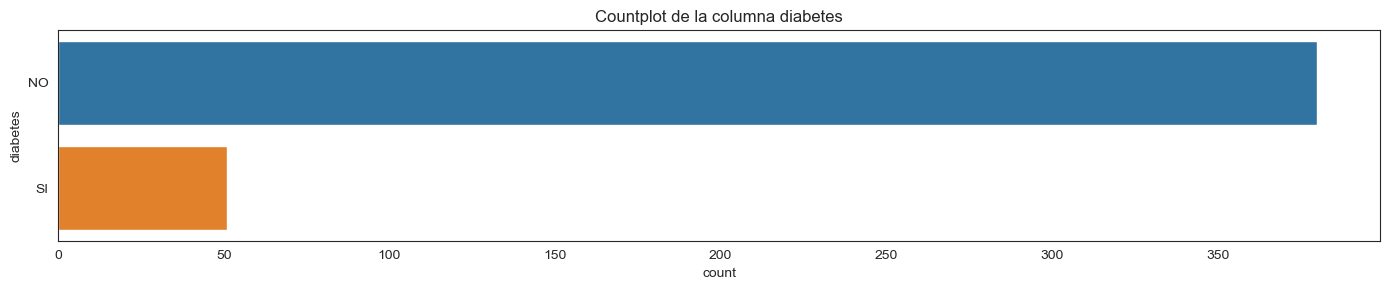

VISUALIZACIÓN DE LA VARIABLE hospitaliz_ult_mes


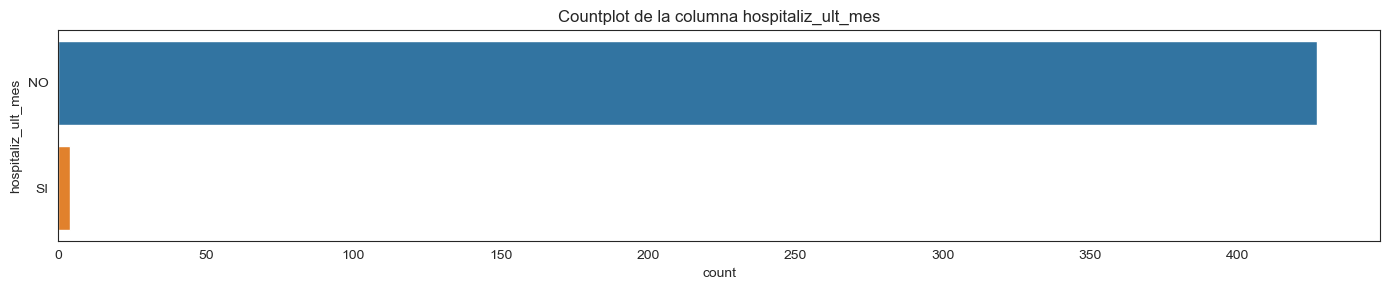

VISUALIZACIÓN DE LA VARIABLE biopsias_prev


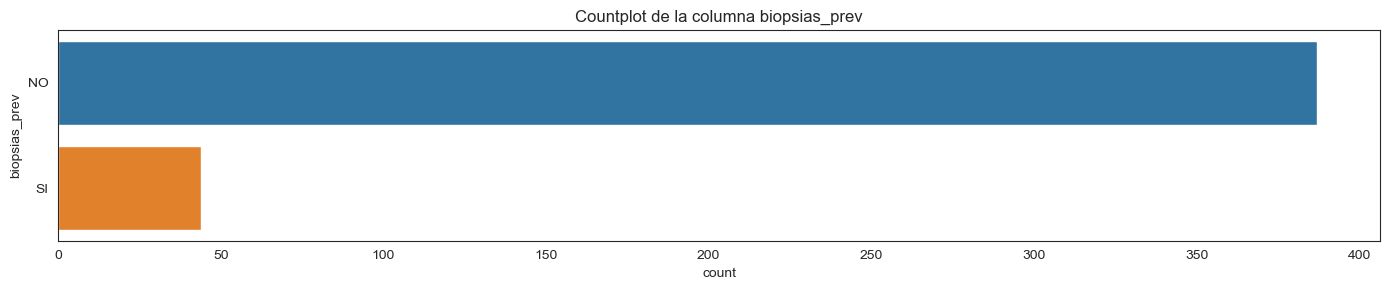

VISUALIZACIÓN DE LA VARIABLE vol_prostatico


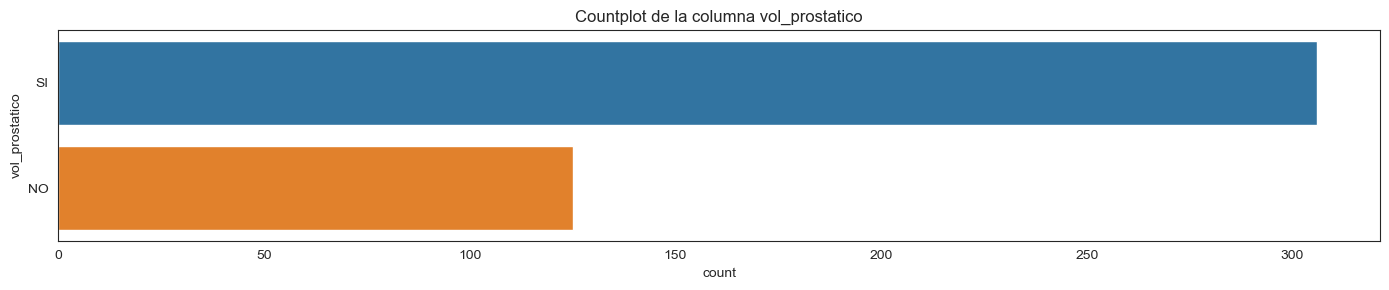

VISUALIZACIÓN DE LA VARIABLE antibiotico_en_profilaxis


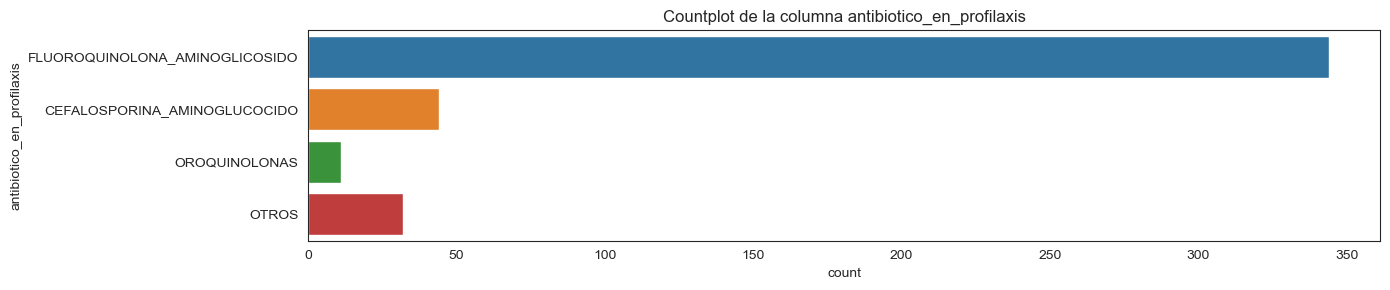

VISUALIZACIÓN DE LA VARIABLE cup


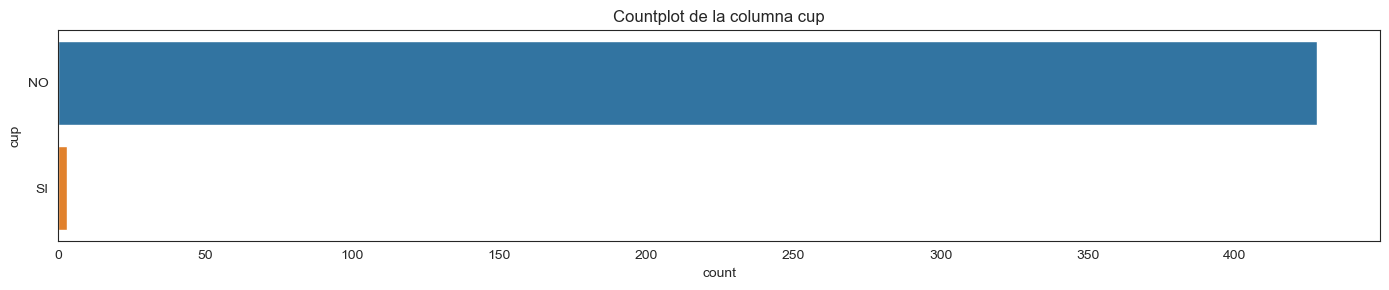

VISUALIZACIÓN DE LA VARIABLE epoc


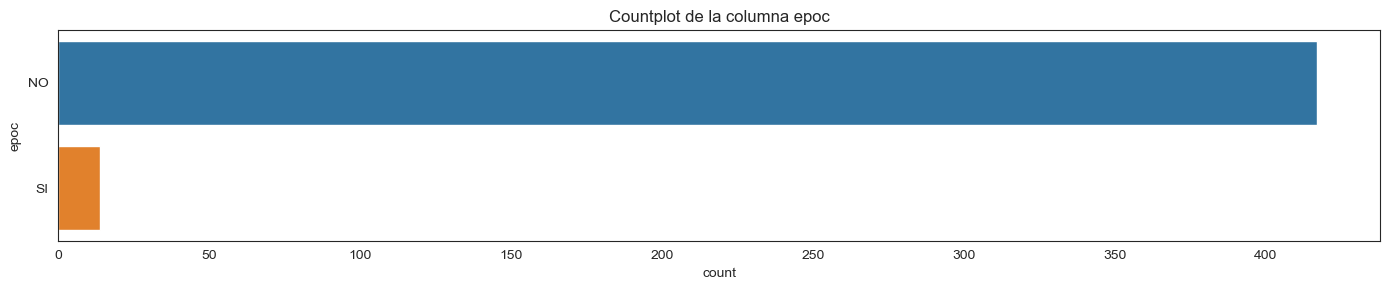

VISUALIZACIÓN DE LA VARIABLE biopsia


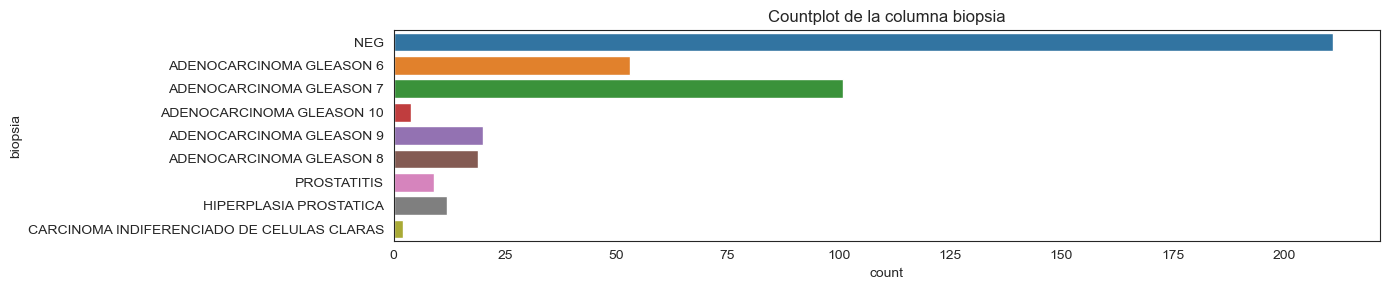

VISUALIZACIÓN DE LA VARIABLE fiebre


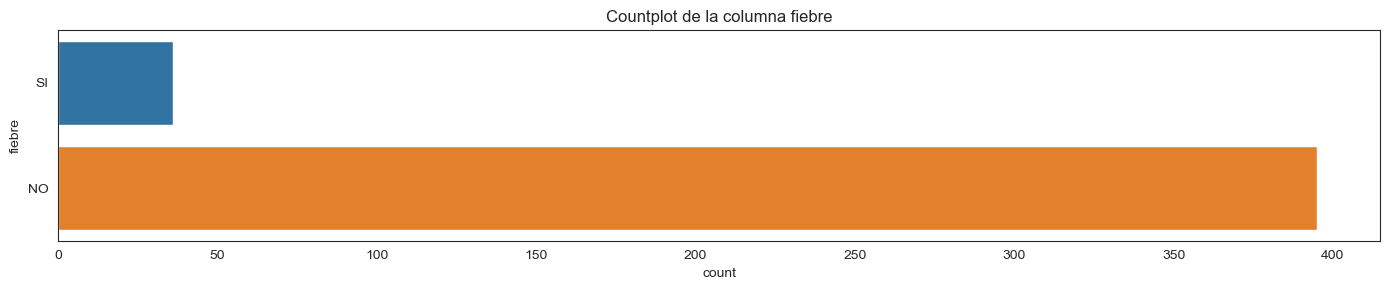

VISUALIZACIÓN DE LA VARIABLE itu


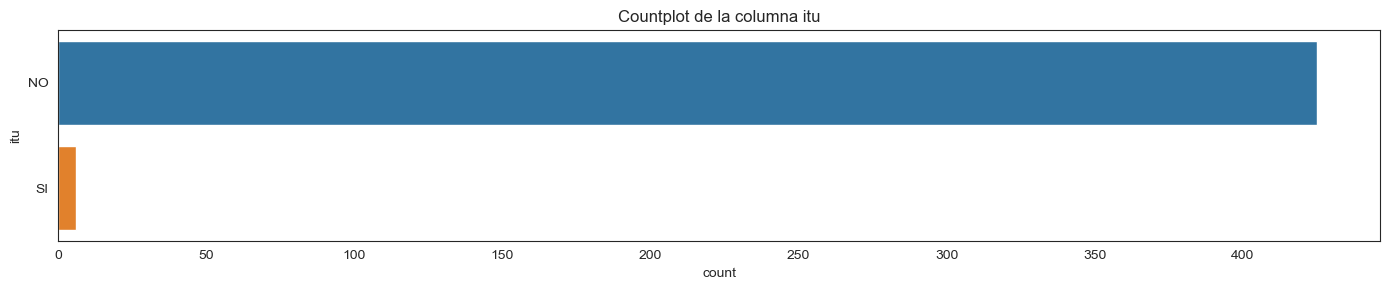

VISUALIZACIÓN DE LA VARIABLE tipo_cultivo


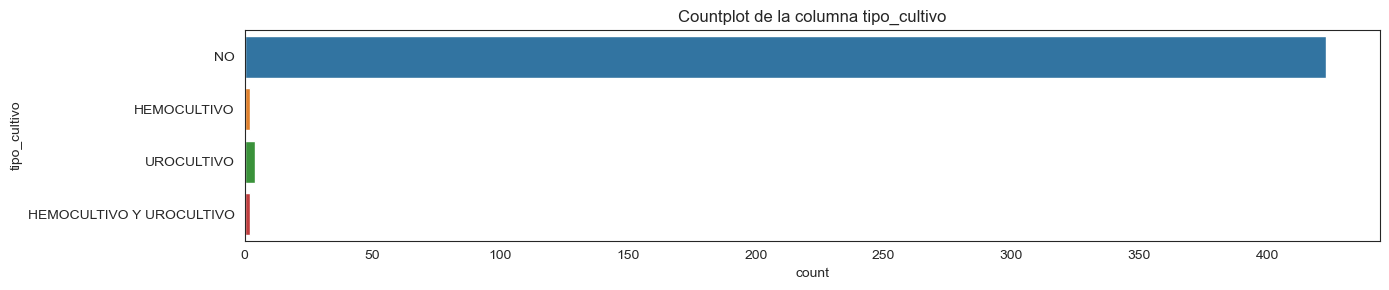

VISUALIZACIÓN DE LA VARIABLE agente_aislado


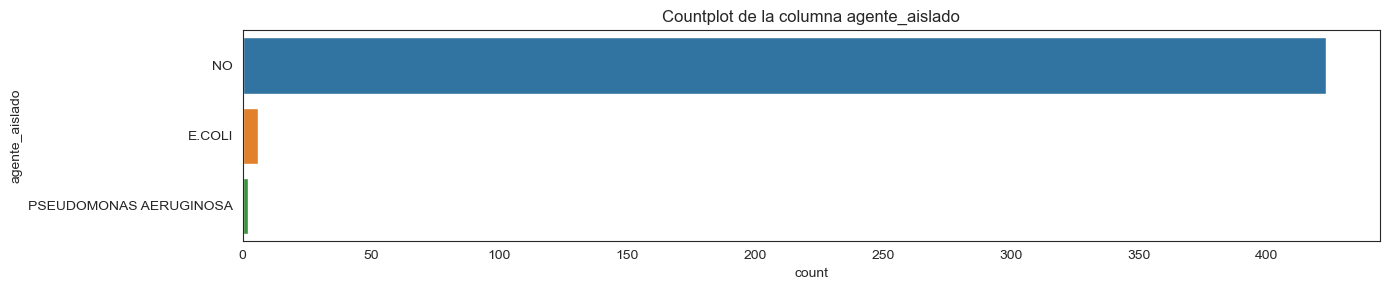

VISUALIZACIÓN DE LA VARIABLE patron_resistencia


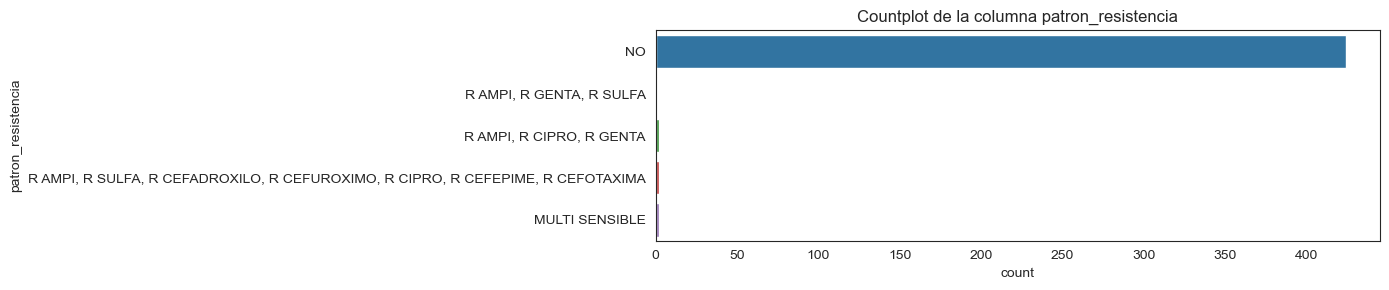

VISUALIZACIÓN DE LA VARIABLE hospitalizacion


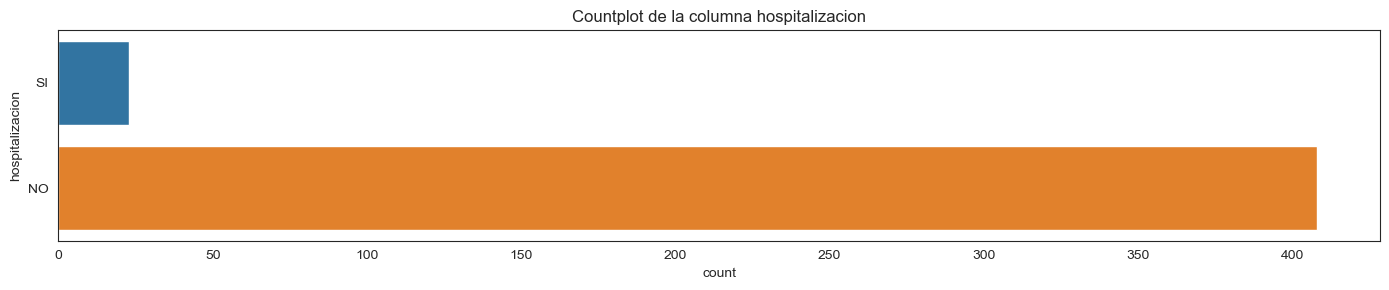

In [45]:
columnas = ['diabetes', 'hospitaliz_ult_mes', 'biopsias_prev', 'vol_prostatico', 'antibiotico_en_profilaxis', 'cup',
            'epoc', 'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion']
for c in columnas:
    print(f'VISUALIZACIÓN DE LA VARIABLE {c}')
    utils.countplot(df, c)

Algunas lecturas de las visualizaciones previas son:

* **diabetes**, **hospitaliz_ult_mes**, **biopsias_prev**, **cup**, **epoc**, **nro_dias_con_infeccion**, **fiebre**, **itu** y **hospitalizacion** clasifican la mayor cantidad de pacientes en la categoría de "NO".
* **vol_prostatico** tiene la mayor cantidad de pacientes con "SI".
* **psa** queda con mayoy cantidad de pacientes en el rango de 4 a 31 ng/ml.
* **antibiotico_en_profilaxis** tiene un alto porcentaje en la categoría fluoroquinolona_aminoglicosido.
* **nro_muestras**, como era de esperarse, presenta la mayor cantidad de paciente en el rango de 10 a 15 muestras.
* **biopsia** tiene varias categorías con diferentes cantidades en cada una, es una de las variables con mayor diversidad de informacion. La mayor proporción de pacientes se clasifican en NEG (resultado negativo).
* **tipo_cultivo** tiene un mayor porcentaje de pacientes con "NO", dado que no se realizaron cultivos, pero además presentan otras tres categorías (hemocultivo, urocultivo, hemocultivo y urocultivo) que podrían agruparse en una sola que puede ser 'SI' para describir que se solicitó algún tipo de cultivo. Por otro lado, **agente_aislado** es similar al anterior, donde mayormente es "NO" dado que no se pidió cultivo o que, si se pidió, no se aisló ningún agente. Pero a su vez tiene otras dos categorías con muy pocos pacientes donde el agente ailado es E. Coli o Pseudomonas aeruginosa.
* **patron_resistencia** tiene mayormente pacientes 'NO' que significa que no tienen ninguna resistencia a antibióticos, pero luego aparecen cuatro categorías mas con muy pocos pacientes en cada una con alguna combinación o grupo de antibióticos para los cuales desarrollan resistencia.

En el siguiente heatmap se puede apreciar de manera resumida el porcentaje de datos por cada una de las variables (eje y) y categorías de dichas variables (eje x). Se hace para evaluar si algunas de las variables es constante. En este caso se adopta como variable constante aquellas variables donde una de sus categorías superen el 99% de etiquetas de la misma categoría. Se adopta 99% porque la variable objetivo presenta cerca del 95% de las categorías con una sola clase y se busca eliminar variables con mayor cantidad de valores constantes.

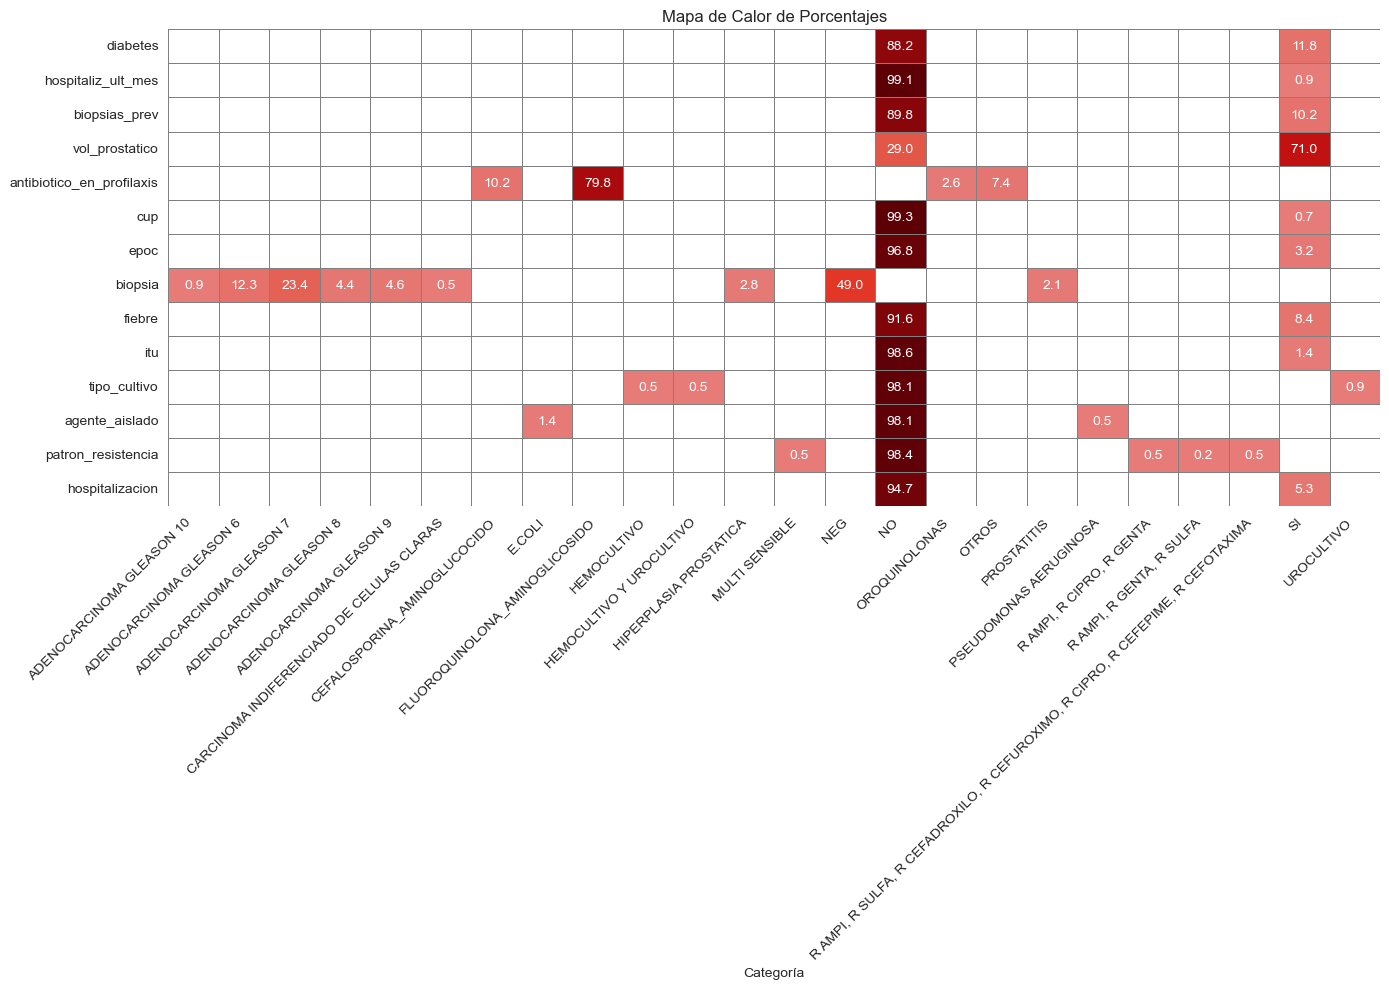

In [46]:
utils.heatmap_categoricas(df)    

De este heatmap se identifican a **hospitaliz_ult_mes** y **cup** como variables donde el 99% de los datos es una sola categoría, en todos los caso 'NO', por lo que se decide borrarlos del conjunto de datos.

In [47]:
columnas_a_eliminar = ['hospitaliz_ult_mes', 'cup']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['edad', 'diabetes', 'psa', 'biopsias_prev', 'vol_prostatico',
       'antibiotico_en_profilaxis', 'nro_muestras', 'epoc', 'biopsia',
       'nro_dias_con_infecc', 'fiebre', 'itu', 'tipo_cultivo',
       'agente_aislado', 'patron_resistencia', 'hospitalizacion'],
      dtype='object')

## Codificación del dataset

Como se tienen variables categóricas y se quiere estudiar si hay alta correlación de algunas variables con la variable objetivo, es necesario codificar dichas categorías en forma numérica. Además, este paso es necesario para que los datos puedan ser interpretados por los modelos de Machine Learning. A continuación, se hace la codificación.

In [48]:
encoded_df = utils.label_encode_categoricals(df)
encoded_df

,edad,diabetes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,1,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,1,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,3,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,1,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,1,0
429,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,1,0
430,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,1,0
431,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,1,0


## Correlación

Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

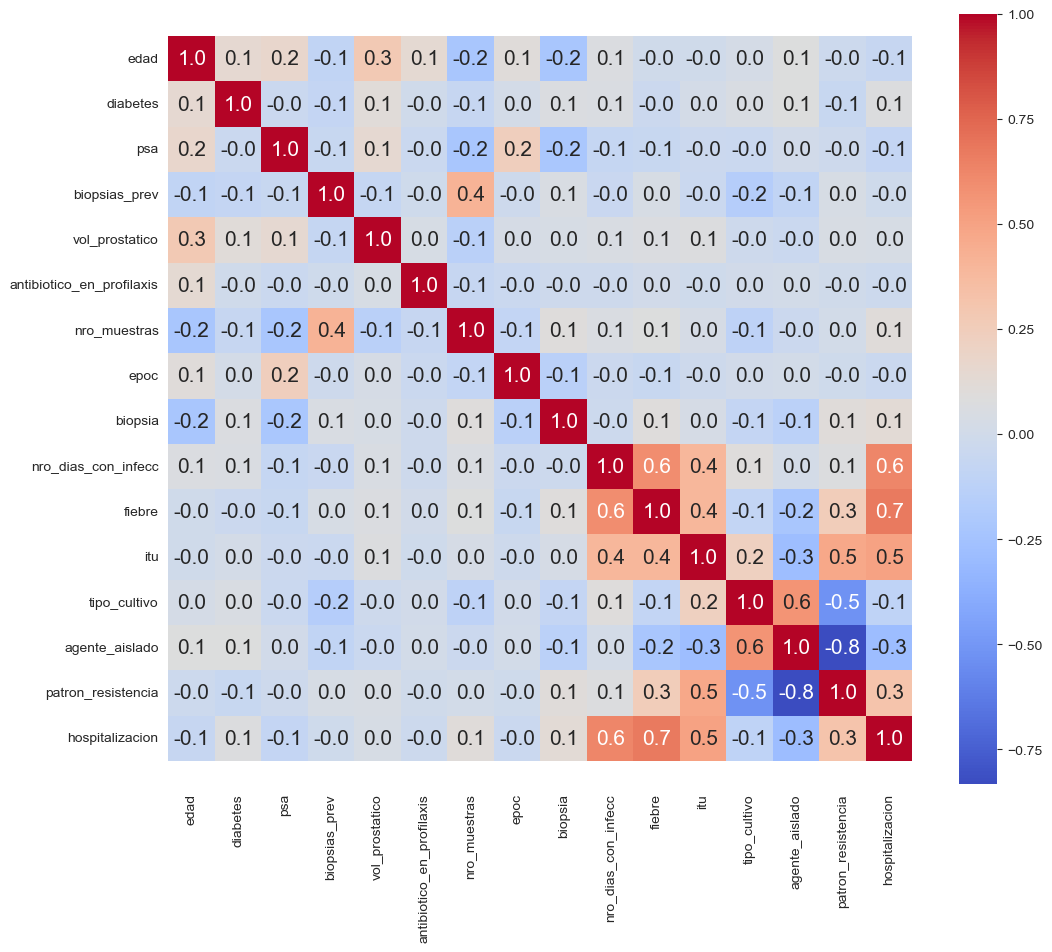

In [49]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
utils.plot_corre_heatmap(corr)

De la matriz se observa que **fiebre** y **nro_dias_con_infecc** tienen alta correlación lineal entre ellas y con la variable objetivo **hospitalizacion**. Se decide eliminar **nro_dias_con_infecc** dado que fiebre es una variable mas fácil de medir.

También se observa una relación bastante fuerte entre **agente_ailado** con **tipo_cultivo** y con **patron_resistencia**, por lo que se decide eliminar *agente_aislado* y *patron_resistencia*.

In [50]:
columnas_a_eliminar = ['nro_dias_con_infecc', 'agente_aislado', 'patron_resistencia']
df = df.drop(columns=columnas_a_eliminar)
encoded_df = encoded_df.drop(columns=columnas_a_eliminar)
df.columns, encoded_df.columns

(Index(['edad', 'diabetes', 'psa', 'biopsias_prev', 'vol_prostatico',
        'antibiotico_en_profilaxis', 'nro_muestras', 'epoc', 'biopsia',
        'fiebre', 'itu', 'tipo_cultivo', 'hospitalizacion'],
       dtype='object'),
 Index(['edad', 'diabetes', 'psa', 'biopsias_prev', 'vol_prostatico',
        'antibiotico_en_profilaxis', 'nro_muestras', 'epoc', 'biopsia',
        'fiebre', 'itu', 'tipo_cultivo', 'hospitalizacion'],
       dtype='object'))

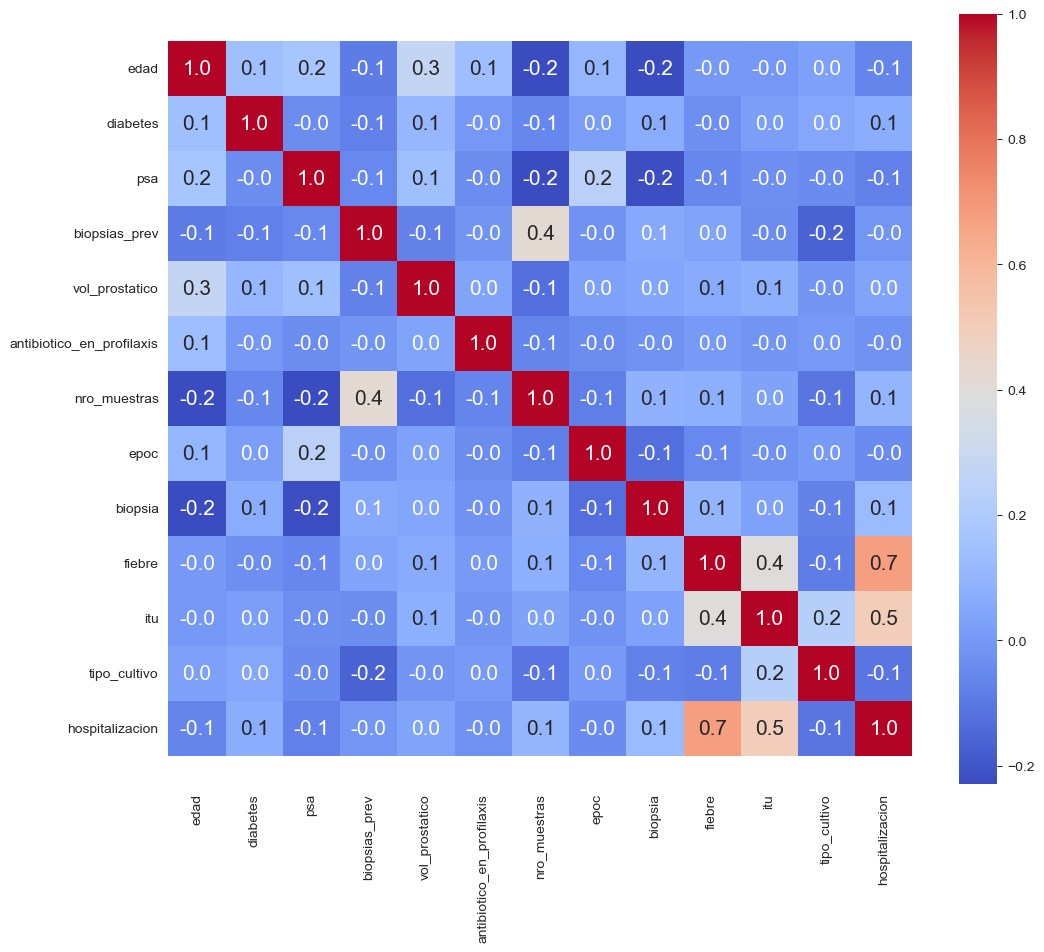

In [51]:
# Calcula la correlación
corr = encoded_df.corr()
# Grafica la correlación
utils.plot_corre_heatmap(corr)

# Carga de los datos transformados y codificados

Se guarda el dataframe que resultó del análisis exploratorio y el que resulta de codificar las columnas categóricas.

In [52]:
df_analizado = 'BBDD_hospitalizacion_analizado.csv'
df_codificado = 'BBDD_hospitalizacion_codificado.csv'

df.to_csv(df_analizado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_analizado}')
encoded_df.to_csv(df_codificado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_codificado}')

Se guardó el archivo BBDD_hospitalizacion_analizado.csv
Se guardó el archivo BBDD_hospitalizacion_codificado.csv
